<a href="https://colab.research.google.com/github/Sindhuhar/deep_learning/blob/main/loading_model_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load a trained Keras/TensorFlow model from disk


In [1]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/loading-model-keras/loading-model-keras.zip
!unzip -qq loading-model-keras.zip
%cd loading-model-keras
!wget https://pis-datasets.s3.us-east-2.amazonaws.com/animals.zip
!unzip -qq animals.zip

--2023-11-08 08:15:19--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/loading-model-keras/loading-model-keras.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 3.5.79.194, 52.92.212.210, 52.218.234.161, ...
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|3.5.79.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 380090 (371K) [binary/octet-stream]
Saving to: ‘loading-model-keras.zip’

loading-model-keras 100%[===================>] 371.18K  1.89MB/s    in 0.2s    

2023-11-08 08:15:19 (1.89 MB/s) - ‘loading-model-keras.zip’ saved [380090/380090]

/content/loading-model-keras
--2023-11-08 08:15:19--  https://pis-datasets.s3.us-east-2.amazonaws.com/animals.zip
Resolving pis-datasets.s3.us-east-2.amazonaws.com (pis-datasets.s3.us-east-2.amazonaws.com)... 52.219.94.154, 52.219.101.250, 52

### Import Packages

In [2]:
# import the necessary packages
from pyimagesearch.preprocessing import ImageToArrayPreprocessor
from pyimagesearch.preprocessing import SimplePreprocessor
from pyimagesearch.datasets import SimpleDatasetLoader
from tensorflow.keras.models import load_model
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

In [3]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

### Loading a Pre-trained Model from Disk

In [4]:
# construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-d", "--dataset", required=True,
# 	help="path to input dataset")
# ap.add_argument("-m", "--model", required=True,
# 	help="path to pre-trained model")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"dataset": "animals",
    "model": "shallownet_weights.hdf5"
}

In [5]:
# initialize the class labels
classLabels = ["cat", "dog", "panda"]

In [6]:
# grab the list of images in the dataset then randomly sample
# indexes into the image paths list
print("[INFO] sampling images...")
imagePaths = np.array(list(paths.list_images(args["dataset"])))
idxs = np.random.randint(0, len(imagePaths), size=(10,))
imagePaths = imagePaths[idxs]

[INFO] sampling images...


In [7]:
# initialize the image preprocessors
sp = SimplePreprocessor(32, 32)
iap = ImageToArrayPreprocessor()

# load the dataset from disk then scale the raw pixel intensities
# to the range [0, 1]
sdl = SimpleDatasetLoader(preprocessors=[sp, iap])
(data, labels) = sdl.load(imagePaths)
data = data.astype("float") / 255.0

In [8]:
# load the pre-trained network
print("[INFO] loading pre-trained network...")
model = load_model(args["model"])

[INFO] loading pre-trained network...


In [9]:
# make predictions on the images
print("[INFO] predicting...")
preds = model.predict(data, batch_size=32).argmax(axis=1)

[INFO] predicting...
1/1 [==============================] - 0s 178ms/step


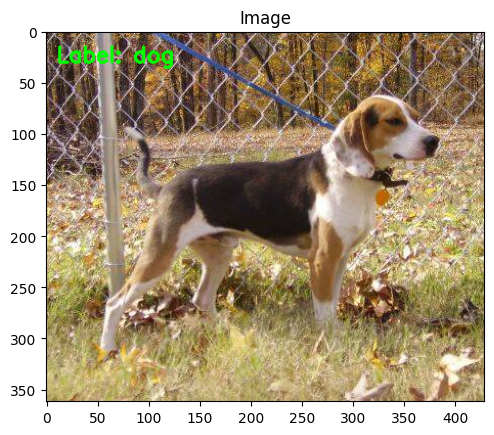

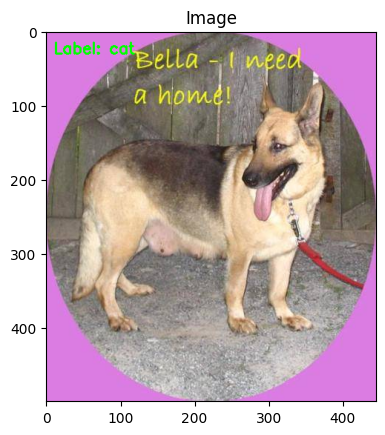

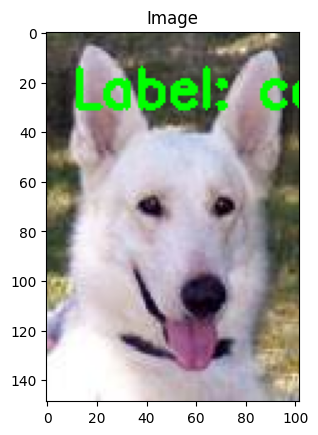

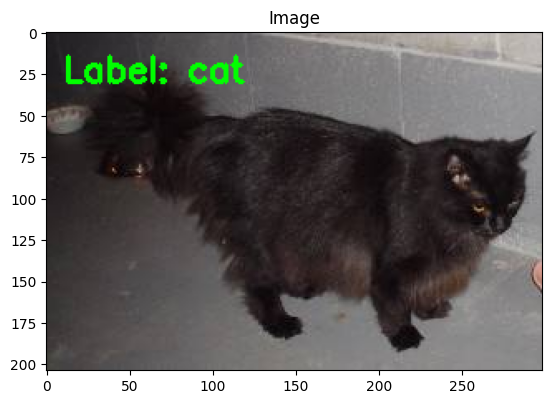

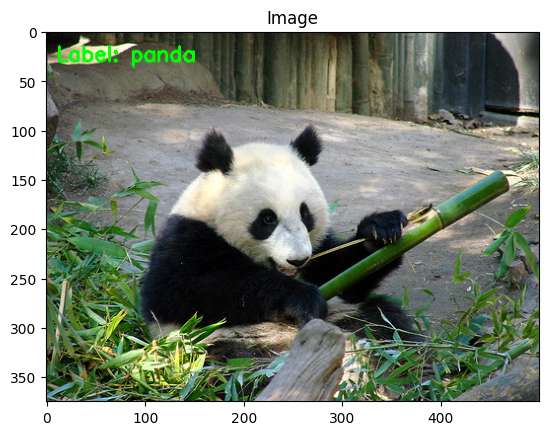

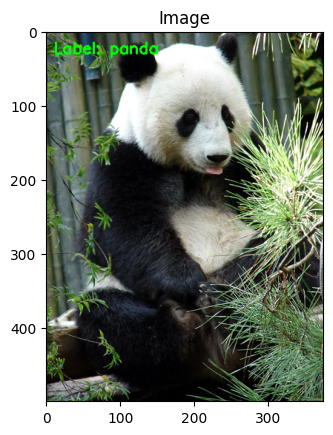

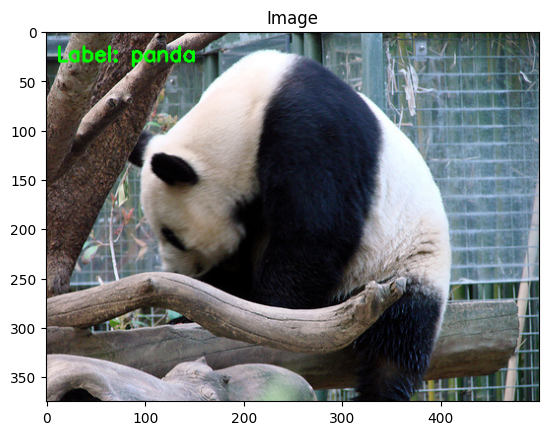

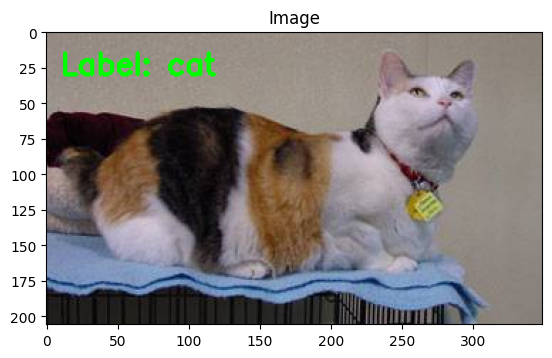

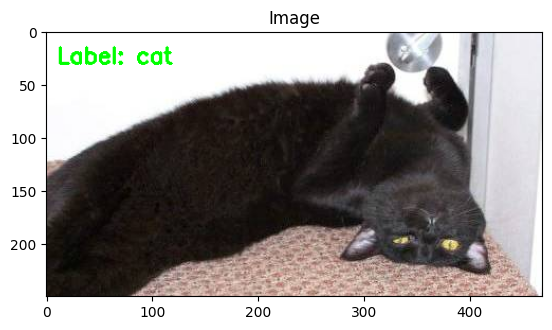

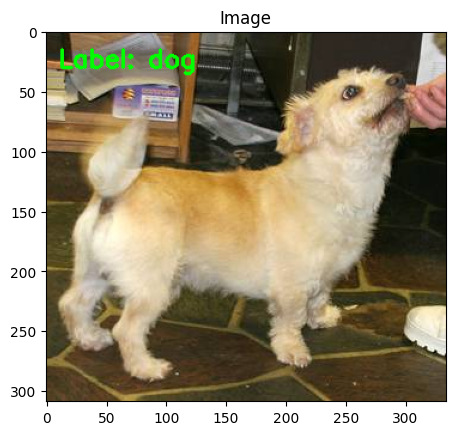

In [10]:
# loop over the sample images
for (i, imagePath) in enumerate(imagePaths):
	# load the example image, draw the prediction, and display it
	# to our screen
	image = cv2.imread(imagePath)
	cv2.putText(image, "Label: {}".format(classLabels[preds[i]]),
		(10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
	plt_imshow("Image", image)